# Lecture Week 2-2

## Topics

## I. Probabilities for the Gaussian Distribution

## II. The Simplest Regression Problem (Fitting for One Parameter) and the Weighted Mean

## III. Regression -- Fitting for Two Parameters


## Lab Exercises

## I. Probabilities for the Gaussian Distribution

## The Gaussian function tells us the probability ($P$) for a certain quantity ($x$) to have a certain value:


##$$
P(x) = ae^{ - {(x - \mu)^2 \over {2 \sigma^2}}}  \text{,}
$$


## where, $a = {1 \over {\sigma \sqrt{2 \pi}}}$, for a normalized Gaussian.  

In [1]:
'''
The class Gaussian -- can calculate the probability.
'''

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

class Gaussian:    
    def __init__(self, mean = 0, sigma = 1):
        self.mean = mean
        self.sigma = sigma
        
    def Calc_P(self, x):
        a = 1/(np.sqrt(2.*np.pi)*self.sigma)
        P = a*np.exp(-(x - self.mean)**2/(2.*self.sigma**2))
        return P
    




In [64]:
lst = [1,2,3]
array(lst)

NameError: name 'array' is not defined

## Breakout Exercise: 

## Cumulative probability of a Gaussian distribution by calculating the area underneath the Gaussian curve.  You may use the Gaussian class defined above.

## Coder: Students who took CP-I

## At the end, you should have these statements printed:

Total Probability for the standard Gaussian (should be 1): 1.0000.

Cumulative Probability between -sigma and sigma: 0.xxxx.

Cumulative Probability between -2\*sigma and 2\*sigma: 0.xxxx.

Cumulative Probability between -3\*sigma and 3\*sigma: 0.xxxx.

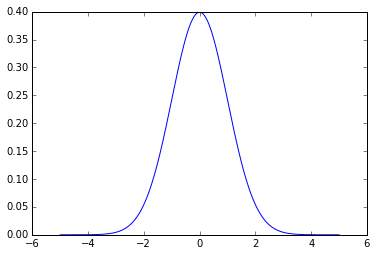

Total Probability for the standard Gaussian (should be 1): 0.999999


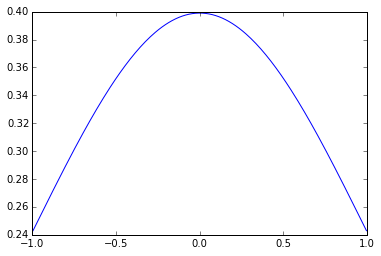

Cumulative Probability between -sigma and sigma: 0.683176


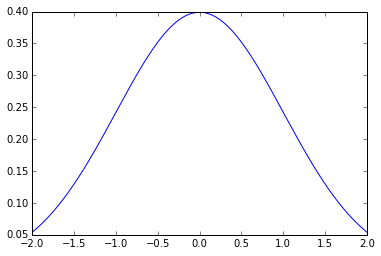

Cumulative Probability between -sigma and sigma: 0.954716


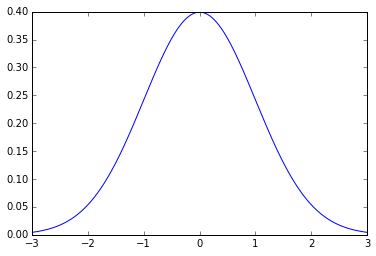

Cumulative Probability between -sigma and sigma: 0.997327


In [61]:
'''
The class Gaussian -- can calculate the probability.
'''

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

class Gaussian:    
    def __init__(self, mean = 0, sigma = 1):
        self.mean = mean
        self.sigma = sigma
        
    def Calc_P(self, x):
        a = 1/(np.sqrt(2.*np.pi)*self.sigma)
        P = a*np.exp(-(x - self.mean)**2/(2.*self.sigma**2))
        plt.figure()
        plt.plot(x, P)
        plt.show()
        return P

    
sig = 1.
step = 1000.
gauss = Gaussian()
x = np.linspace(-sig*5, sig*5, step)
dx = ((sig*5)*2)/(step-1)
f = gauss.Calc_P(x)
p = np.sum(f*dx)

print("Total Probability for the standard Gaussian (should be 1): {:f}".format(p))

i = 1
f_dict = {}
p_dict = {}
while i <= sig*3:
    p1 = np.sum(gauss.Calc_P(x[(x<=i)*(x>=-i)])*dx)
    print("Cumulative Probability between -sigma and sigma: {:f}".format(p1))
    i += 1


# x1 = x[(x<=1)*(x>=-1)]
# # x_sig1 = x[x_ind1]
# f1 = gauss.Calc_P(x1)
# p1 = np.sum(f1*dx)
# print("Cumulative Probability between -sigma and sigma: {:f}".format(p1))

# x2 = x[(x<=2)*(x>=-2)]
# # x_sig1 = x[x_ind1]
# f2 = gauss.Calc_P(x2)
# p2 = np.sum(f2*dx)
# print("Cumulative Probability between -sigma and sigma: {:f}".format(p2))

# x3 = x[(x<=3)*(x>=-3)]
# # x_sig1 = x[x_ind1]
# f3 = gauss.Calc_P(x3)
# p3 = np.sum(f3*dx)
# print("Cumulative Probability between -sigma and sigma: {:f}".format(p3))

In [8]:
x = np.linspace(0, 10, 11)
print(x)
ind = x<5
print(ind)
print(x[ind])

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
[ True  True  True  True  True False False False False False False]
[ 0.  1.  2.  3.  4.]


## II. The Simplest Linear Regression -- Fitting for One Parameter 

### (Recall it’s a regression problem if we are trying to determine the value of a continuous quantity the best we can.)

### In the discussion below the assumptions (there are two) we make are sandwiched between long, opposite-facing arrows:

### --->                     <---

### A) The goal of experimental science: You make measurements to gain knowledge about reality.  We will make a more practical statement of this at the end of this sub-section.

For example, let’s say, you make several temperature measurements to find out the true temperature of a room.

Let’s call the results of these measurements data, $D$.  $D$ of course consist of all the measured temperature values.  If you have measured the temperature $N$ times, and the temperature value you get for the $i$th measurement is $t_i$,  then $D$ = {$t_1$, $t_2$, $t_3$, …, $t_N$} = {$t_i$}.

In what follows below:

$T_{true}$: The true temperature

$T$: The value of a guess we have for $T_{true}$

$T_{best}$: Our best guess for $T_{true}$ according to some criterion.

$t$: Experimental result of a temperature measurement.

Each of your temperature measurements will have uncertainty.  Intuitively you know that: 

-  It’s more likely to have a measured value that is close to the true temperature than to have one that is far away.   
-  The more accurate your measurements (e.g., you have high quality equipment), the less likely it is to have a measured value that is very far away from the true temperature.


Mathematically we assume:

--->  We can model the probability of getting a certain measurement result using a Gaussian, with the true value of the quantity as $\mu$ and the measurement uncertainty as the width, $\sigma$, of the Gaussian <---

If the difference between the measured value ($t$) and the the true temperature ($T_{true}$) is ($t - T_{true}$), the probability of such a measurement occurring is 

$P(t; T) = \frac{1}{\sqrt{2\pi\sigma}} e^{ \frac{ (t - T_{true})^2 } { 2\sigma^2 }}$	(1)

Given the uncertainty, which will always be there, you can never know the temperature for sure based on your data.  But based on your data, you try to make the best estimate for the true temperature.

### This is the goal of any experimental science. 

### B) To state the goal at the end of A) more formally:

Question 1 — _Given a set of data, what is the probability that the true temperature, $T_{true}$, has a value $T$?_  

If we can answer Question 1 then it’d be easy to obtain our best estimate for the true temperature:

_The temperature value that has the highest probability (as defined in Question 1) is our best estimate for the true temperature._  

For example, suppose you have made three measurements, and you get

$$t_1 = 68.5 \pm 0.5$$
$$t_2 = 68.3 \pm 0.5$$
$$t_3 = 68.9 \pm 0.5$$

The quantity that follows $\pm$ is the uncertainty, or sigma (see eqn (1) above).

Based on the data and the uncertainty, if someone asks you:

-  How likely is it that the true temperature, $T_{true}$, is 30?  You say, “No way!”  (Very low probability)

-  How likely is it that $T_{true}$ is 69?  You say, “I guess it’s possible.” (Intermediate probability)

-  How likely is it that $T_{true}$ is 68.5?  You say, “Quite possible.” (High probability)

If there is a way to calculate the probability for the different possible temperature values, $T$, as being $T_{true}$, then as I said, we can simply maximize that probability, and the temperature value that corresponds to the maximum probability is our best guess for the true temperature.


### C) To re-state B) Mathematically:

-  We first find the probability that the true temperature has the value $T$ given the data set $D$,

   $$P(T|D)$$ 
   
   

-  Then we maximize $P(T|D)$: The $T$ value that maximizes this probability will give us the best guess for the true temperature.

While we have an intuitive sense of that probability (see B) above), it turns out

### we *CANNOT* derive an expression for this probability. 

### D) So we try another Route:

The probability for which we *CAN* derive an expression for is this:

Question 2: _Given the true temperature having a value ${T}$, what is the probability that the observed data set should have occurred?”_ 

Mathematically you can write this as 

$$P(D|T)$$

again, it's the probability that the observed data turns out to be $D$, if the true temperature has a value of $T$.

Note that Question 2 is different from Question 1!

Let’s focus on Question 2 for a moment.  The reason that Question 2 is answerable mathematically is that if the true temperature has value $T$, then the probability you will have a measured value of $t_1$ is (see eqn (1) above): 

$P(t_1; T) = \frac{1}{\sqrt{2\pi\sigma}} e^{ \frac{ (t_1 - T)^2 } { 2\sigma^2 }}$ 

Likewise, the probabilities you would have measured values $t_2$ and $t_3$, are  

$P(t_2; T) = \frac{1}{\sqrt{2\pi\sigma}} e^{ \frac{ (t_2 - T)^2 } { 2\sigma^2 }}$ 

$P(t_3; T) = \frac{1}{\sqrt{2\pi\sigma}} e^{ \frac{ (t_3 - T)^2 } { 2\sigma^2 }}$ 


The probability that you have all three measured values is

$P(D|T) = P(t_1, t_2, t_3; T) = P(t_1; T)P(t_2; T)P(t_3; T)$

#### We have just answered Question 2!

Let’s continue…

Given this expression, you can try using different $T$ values and see which one gives you the highest probability.  But the best way to do this is to do 


$$\frac{dP(D|T)}{dT}  = \frac{dP(t_1, t_2, t_3; T)}{dT} = 0$$

Since you now have an explicit mathematical expression for $P(D|T) = P(t_1, t_2, t_3; T)$, you can easily calculate the derivative, set it to zero, and find the $T$ value that maximizes $P(D|T)$.

So here comes the second assumption:

---> We assume that the $T$ value that maximizes the probability defined in Question 2 will maximize the probability defined in Question 1, i.e., it’s our best guess for the true temperature. <---

It is an assumption because we cannot show the same $T$ will maximize both the probabilities in Question 1 and Question 2 (because we don't have an expression for the probability in Question 1!).


Quick Re-cap:

$P(T|D)$: The probability that, given the observed data, $D$, the true temperature has a value of $T$.

$P(D|T)$: The probability that, given the true temperature has a value of $T$, the observed data $D$ would occur. 


Yes, it's a subtle difference...we will come back to this difference in Week 6.

### E) Practically (continuing the approach outlined in D)), 

if you maximize $P(D|T)$ in D) with respect to $T$, you get 

$$T_{best} = \frac{1}{N} {\sum_{i = 1}^{N} {t_i} } = \langle t \rangle \qquad \text{(2)}$$        					 

That is, the mean value of the data set gives the best guess we have for the true temperature $T_{true}$.

Now we can further ask, since $T_{best}$ must have an uncertainty (or standard deviation) as well, what would the uncertainty be?

With a little math, you can show the standard deviation of $T_{best}$ is 

$$s_{T_{best}} = \frac{\sigma} {\sqrt{N}} \qquad \text{(3)}$$								

In this case $N$ = 3, so 

$$s_{T_{best}} = \frac{\sigma} {1.7} \qquad \text{(4)}$$								


That is, if we take into account the results of all three measurements, we now have a tighter estimate for the true temperature.

[If this is a statistics course, I would have you go through the calculations, and verify for yourself that it’s all true.]


#### Let’s now take a step back:

That the mean of the data points gives us a tighter estimate of the true temperature seems rather obvious -- why did we go through so much trouble to get here in this long-winded way.  

Because there are circumstances where it’s not nearly as obvious how to arrive at the best guess.  Then this prescription will show us how to get $T_{best}$.

For example, what if the uncertainty is different for each of the 3 temperature measurements?

It’s clear enough that in order to take into account all three measurements properly, you would want to give more weight to the points that have less uncertainty.  But what’s the exact prescription?

It turns out if you maximize the probability in Question 2 you will find the best guess is

$$T_{best} = \frac{ \sum_{i = 1}^{N} { t_i/\sigma_i^2 } } {\sum_{i = 1}^{N} {1/\sigma_i^2} } \qquad \text{(4)}$$      	

You can check that it works for the case of all three $\sigma_i$’s being the same:


$$T_{best} = \frac{1}{N} {\sum_{i = 1}^{N} {t_i} }$$

or just the mean.

#### Eqn (4) is called the weighted mean.

Again with a  little math, the uncertainty (standard deviation) *squared* of the weighted mean can also be calculated, and it is

$$s_{T_{best}}^2 = \frac{1} {\sum_{i = 1}^{N} {1/\sigma_i^2} } \qquad \text{(5)}$$				

You can verify that if, 

$$\sigma_i = \sigma$$

eqn (5) becomes the same as eqn (3). 

## Important Takeaway:

### If the only experimental uncertainty you have to contend with is Gaussian (a good assumption in many cases):

(Continuing to use temperature measurement as an example)

-    The weighted mean is a better estimate of the true temperature

     $T_{best} = \frac{ \sum_{i = 1}^{N} { t_i/\sigma_i^2 } } {\sum_{i = 1}^{N} {1/\sigma_i^2} }$      	
     

-    The uncertainty (the standard devisation) of the mean is 

     $s_{T_{best}} = \sqrt { \frac{1} {\sum_{i = 1}^{N} {1/\sigma_i^2}}  }$				


### Further, if the experimental uncertainty is the same for all $N$ measurements:


-    $T_{best} = \frac{1}{N} {\sum_{i = 1}^{N} {t_i} } = \langle t \rangle $        					
     

-    $s_{T_{best}} = \frac{\sigma} {\sqrt{N}}$



## Going back to the very top: The Simplest Linear Regression -- Fitting for One Parameter.

## In this example, we're using the data to "fit for" -- that is, to find the best guess for -- the true temperature.

## Example:

- ### Generate a set of 50 Gaussian random numbers that represent 50 temperture measurements.  The true temperature is 70 and the measurement uncertainty is 0.5.  That is, the Gaussian model should have T_true (= mu) = 70 and sigma = 0.5.

    ### Note: In reality, of course, you don't know the true temperature (otherwise, what's the point of measuring it?).  But in the simulated world, you know everything!

-  ### Find the mean and standard deviation of the set of measurement results and report them as 

    - ### t_mean 

    - ### sig_t.  

   ### Are the values of t_mean and sig_t what you would expect?
    
- ### Plot the histogram of the measurements using 7 bins (normed = True in plt.hist recommended);
    


The mean temperature value is 70.051 deg (expected: 70.000).
The standard deviation of the simulated temperature measurement results are 0.520 deg (expected: 0.500).


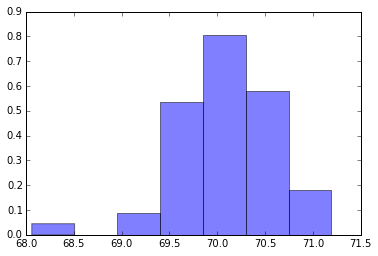

In [59]:
# simluate temperature measurements
import numpy as np
from __future__ import print_function

T_true = 70
sigma = 0.5
N = 50

t = np.random.randn(N)*sigma + T_true
t_mean = t.mean()
sig_t = np.std(t)

print("The mean temperature value is {:.3f} deg (expected: {:.3f}).".format(t_mean, T_true))
print("The standard deviation of the simulated temperature measurement \
results are {:.3f} deg (expected: {:.3f}).".format(sig_t, sigma))

# ---> # Note the _ notation: the underscore represents a returned value that we don't care about.
bin_heights, xbins, _ = plt.hist(t, bins = 7, normed = 1, alpha = 0.5)
plt.show()

In [60]:
print(type(t))

<type 'numpy.ndarray'>


# 5-min Break

## III. Regression -- Fitting for Two Parameters:

### Let's use a simple example: $x$ is time and $y$ is the temperature.  Our goal is to model how the temperature increases in the morning.  The simplest model for this phenomenon is a straight line.

### We say the data now has "Two Degrees of Freedom (DOF)".

### In the one-parameter problem, the data points (room temperature as measured by $N$ thermometers).  Depending on the actual temperature, all $N$ measurement results can shift up and down together.  That's one degree of freedom.

### Now, imagine plotting the the temperature measurements made at different times vs. time.  The points can certainly still shift up and down together, depending on whether it's a hot day or a cold day.  But they can also tilt, depending on how fast the temperature is rising with time.  Hence, two degrees of freedom.


## Modeling the data as a straight line

That means we think the true relationship between a set of random numbrs (the temperature measurement results) and time is described by a straight line. 

The goal is then to find the slope ($m$) and intercept ($b$) that best fit the data.

Our starting point last time was Question 2 above: First calculate 

$$P(D|T)$$

and then maximize $P(D|T)$ against $T$.  The temperature value that maximizes this probability is our best guess for the true temperature.

This time we will also start from Question 2, except now there are two parameters, so we calcuate

$$P(D|[m, b])$$

and of course the data will consist of pairs of random numbers:

$D = \{(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)\} = \{(x_i, y_i)\}$ 

Then, we vary $[m, b]$ until the probability of having the measured data be $D$ ($= \{(x_i, y_i)\}$) is maximized.

###*The pair $[m, b]$ that maximizes this probability is our best guess for the true slope and intercept.*

## To find the best-fit [$m$, $b$]

If you go through the math, you wil see that maximizing the probability $P(D|[m, b])$ is the same as *minimizing*


$$ \sum_{i=1}^N {[y_i - f(x_i)]^2}  = \sum_{i=1}^N {[y_i - (mx_i + b)]^2}  \qquad \text{(7)}$$

where $f(x) = mx + b$, is the linear model.

(Let's think about this result.  It's NOT

$$ \sum_{i=1}^N {[y_i - (mx_i + b)]}  \qquad \text{(8)}$$

This condition is easy to meet: Plot the $(x_i, y_i)$ in a Cartesian coordinate system and find the "center of mass" (CM) of the points -- any line that goes through the CM will satisfy eqn (8).  Because half of the points will be above, and the other half below, such a line.  So we can't find the best-fit line this way.)

The expression in (7) is called the residual sum of squares (RSS), and the problem to minimize RSS is called:
### *Least-squares minimization* 

## Let's begin!

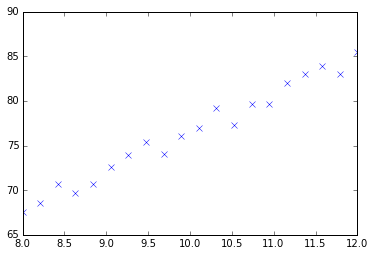

In [12]:
%matplotlib inline
# First simulate data, N pairs of {x_i, y_i} using numpy arrays.
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(8, 12, 20)
m_true = 4.2
b_true = 35

sig = 1.2

# ---> This line is the key: it simulates the temperature measurements
y = m_true * x + b_true + np.random.randn(x.shape[0]) * sig

plt.plot(x, y, 'x')
plt.show()

## Breakout Exercise: 

## Given (m, b) = (2, 50), calculate the RSS.

## Start by writing a function f(m, b, x) that returns the model values for y (this is basically the f(x) two cells above), given m, b, and an array, x.

## Breakout Exercise: 

## Search through a range of m and b values and find the pair that minimizes RSS.  You can make use of the function f you wrote above.

## You can start by searching for m in the range of (0, 10) and for b in the range of (0, 100) -- 10 steps in each direction. 

In [15]:
'''
Least square minimization: Grid search.

Note: for some simulation, I don't exactly get the input values of m and b.
'''

m_start, m_end = 0, 10
b_start, b_end = 0, 100

rss_min = 1e6
for m in np.arange(m_start, m_end, 0.1):
    for b in np.arange(0, 100, 1):
        rss = ((y - f(m, b, x))**2).sum()
        if rss < rss_min:
            rss_min = rss
            m_best = m
            b_best = b
print(rss_min, m_best, b_best)

17.0933963333 4.3 33


## Breakout Exercise: 

## Plot the simulated data and the best-fit line in the same plot.

## To include "error bars" in your plot:

-  ## Change plt.plot to plt.errorbar; 

-  ## include yerr =  sig;

-  ## also pay attention to how to format the plotting symbols.

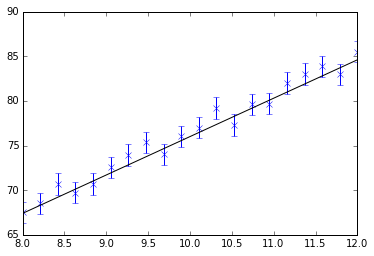

In [19]:
# A better way to tlotting best fit result
plt.errorbar(x, y, yerr = sig, fmt = 'x')
plt.plot(x, f(m_best, b_best, x), 'k-')
plt.show()

## Lab Breakout Exercise:

## 1. Repeat the simulation in the example above 100 times, each time store t_mean.  Then find the average and standard deviation of the 100 t_mean's, and report them, respectively, as 

-  ## t_MEAN


-  ## sig_t_mean.  

## Find the expected standard deviation of t_mean, and report it as 

-  ## sig_t_mean_expt

## Are the values of t_MEAN and sig_t_mean (compared with sig_t_mean_expt) what you would expect?

## 2. Plotting

-  ## plot the histogram for the last of the 100 times the simulated experiment was carried out (recall N = 50), again using 7 bins, and then plot a smooth Gaussian over the histogram.

-  ## plot the historgram for the 100 t_mean's -- choose the number of bins wisely -- and then plot a smooth Gaussian over it.

-  ## put the two historgrams on the same plot.


## 3. Generate a set of 50 Gaussian random numbers that represent 50 temperture measurements.  The true temperature is 70 and the measurement uncertainty is different for each of the measurements (let's say you used 50 different thermometers to make the 50 measurements).  Suppose the uncertainties are: 

(0.3, 0.4, 0.15, 0.2, 0.5, 0.6, 0.1, 0.2, 0.15, 0.25,  
0.2, 0.14, 0.35, 0.32, 0.23, 0.7, 1., 0.32, 0.51, 0.5,  
0.3, 0.24, 0.5, 0.33, 0.51, 0.26, 0.31, 0.42, 0.15, 0.25,  
0.13, 0.42, 0.15, 0.2, 0.5, 0.6, 0.1, 0.2, 0.15, 0.25,  
0.32, 0.3, 0.2, 0.4, 0.3, 0.65, 1., 0.2, 0.35, 0.15).  


## Find the weighted mean of the data, and report it as t_mean.

## 4. Repeat 3. above 100 times and report 

## t_MEAN, sig_t_mean, and sig_t_mean_expt.

## Are the values of t_MEAN and sig_t_mean what you would expect?


In [65]:
x = np.arange(10)

AttributeError: 'numpy.ndarray' object has no attribute 'append'